# Байесовская статистика
## Задание BS.7


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 40 баллов

---

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил код</font></b>

* <b><font size="4">Задача 3</font></b>
  * <b><font color="#00b565" size="3">Исправил код и ответ</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек

In [13]:
# Bot check

# HW_ID: ds_bs7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [14]:
import numpy as np   
import scipy.stats as sps
import matplotlib.pyplot as plt
from time import sleep
from bayes_opt import BayesianOptimization
# from bayes_opt import UtilityFunction  # !!! cannot import name 'UtilityFunction' from 'bayes_opt' ни при какой версии bayes_opt, даже в kaggle(
from matplotlib import gridspec
import pandas as pd
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from catboost import CatBoostRegressor
from tqdm import tqdm
from time import time

__________________
### Задача 1.


Напишите класс регрессии на гауссовских процессах.

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>  
▫️ Маленькая ошибка в реализации. Инд. комм. Обращать C на каждый предикт очень дорого (-10.0)</i>    

In [15]:
class GaussianProcessRegression:
    def __init__(self, cov_function):
        self.cov_function = cov_function
    def fit(self, X, Y, regularize=1e-9):  # по дефолту с оч слабой регуляризацией, иначе возникала ошибка
        ''' Обучение модели регрессии на гауссовских процессах.
        X --- np.array, размерность (n, d): точки, в которых проведены измерения
        Y --- np.array, размерность n: полученные значения случайного поля
        '''
        self.X, self.Y, self.reg = X, Y, regularize*np.eye(Y.shape[0])
        self.C = self.cov_function(X[:,None,:]-X[None,...])
        self.C_inv = np.linalg.inv(self.C + self.reg)
        return self
    def predict(self, X):
        ''' Оценка значений случайного поля. 
        X --- np.array, размерность (n, d): точки, в которых нужно оценить значения. 
        Возвращает:
        values --- np.array, размерность n: предсказанные значения поля
        sigma --- np.array, размерность n: соответствующая дисперсия
        '''
        K = self.cov_function((X[:,None,:]-self.X))
        mean = (K @ self.C_inv @ self.Y[:,None]).squeeze()
        sigma = np.sqrt((self.C[0,0] - (K[:,None,:] @ self.C_inv @ K[...,None])).squeeze())
        return mean, sigma

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

Зададим какую-нибудь простую функцию $f(x)$

In [16]:
def calc_f(x, a=0.2, b=0.5, c=2):
    return np.log(1+x) + a*x + b*np.sin(c*x)

И ковариационную функцию
$$R(x) = a\ exp\left(-\frac{\left\| x \right\|^2} {2s^2} \right),$$
где
* $x \in \mathbb{R}^d$;
* $a, s > 0$ &mdash; параметры.

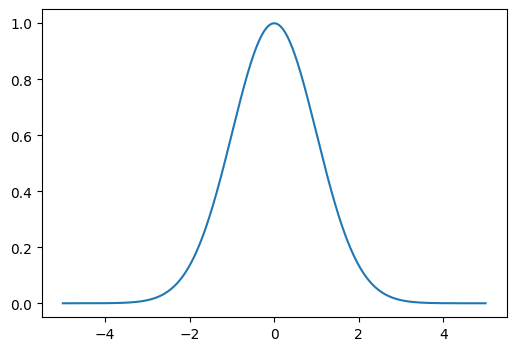

In [17]:
def exp_cov(x, a=1, s=1):
    return a * np.exp(-(x**2).sum(axis=-1) / (2 * s**2))

def plot(grid, f):  # пригодится в следующей задаче
    plt.figure(figsize=(6, 4))
    plt.plot(grid, f(grid.reshape((-1,1))))
    plt.show()

plot(np.linspace(-5, 5, 1001), exp_cov)

Проведем эксперименты.
Зададим гауссовский процесс $(Y_x, x\in\mathbb{R})$ в виде $Y_x = f(x) + \sigma\varepsilon_t$, где $(\varepsilon_x, x\in\mathbb{R})$ &mdash; гауссовский белый шум, то есть все $\varepsilon_x$ независимы и имеют стандартное нормальное распределение.

В качестве моментов времени $x_1, ..., x_n$ гененируем несколько точек на прямой.
Для начала возьмем $\sigma=0$, что соответствует отсутствию погрешности измерений.
Выполните код ниже.

3it [00:00, 23.76it/s]/tmp/ipykernel_31/2119596884.py:22: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt((self.C[0,0] - (K[:,None,:] @ self.C_inv @ K[...,None])).squeeze())
6it [00:00, 26.03it/s]


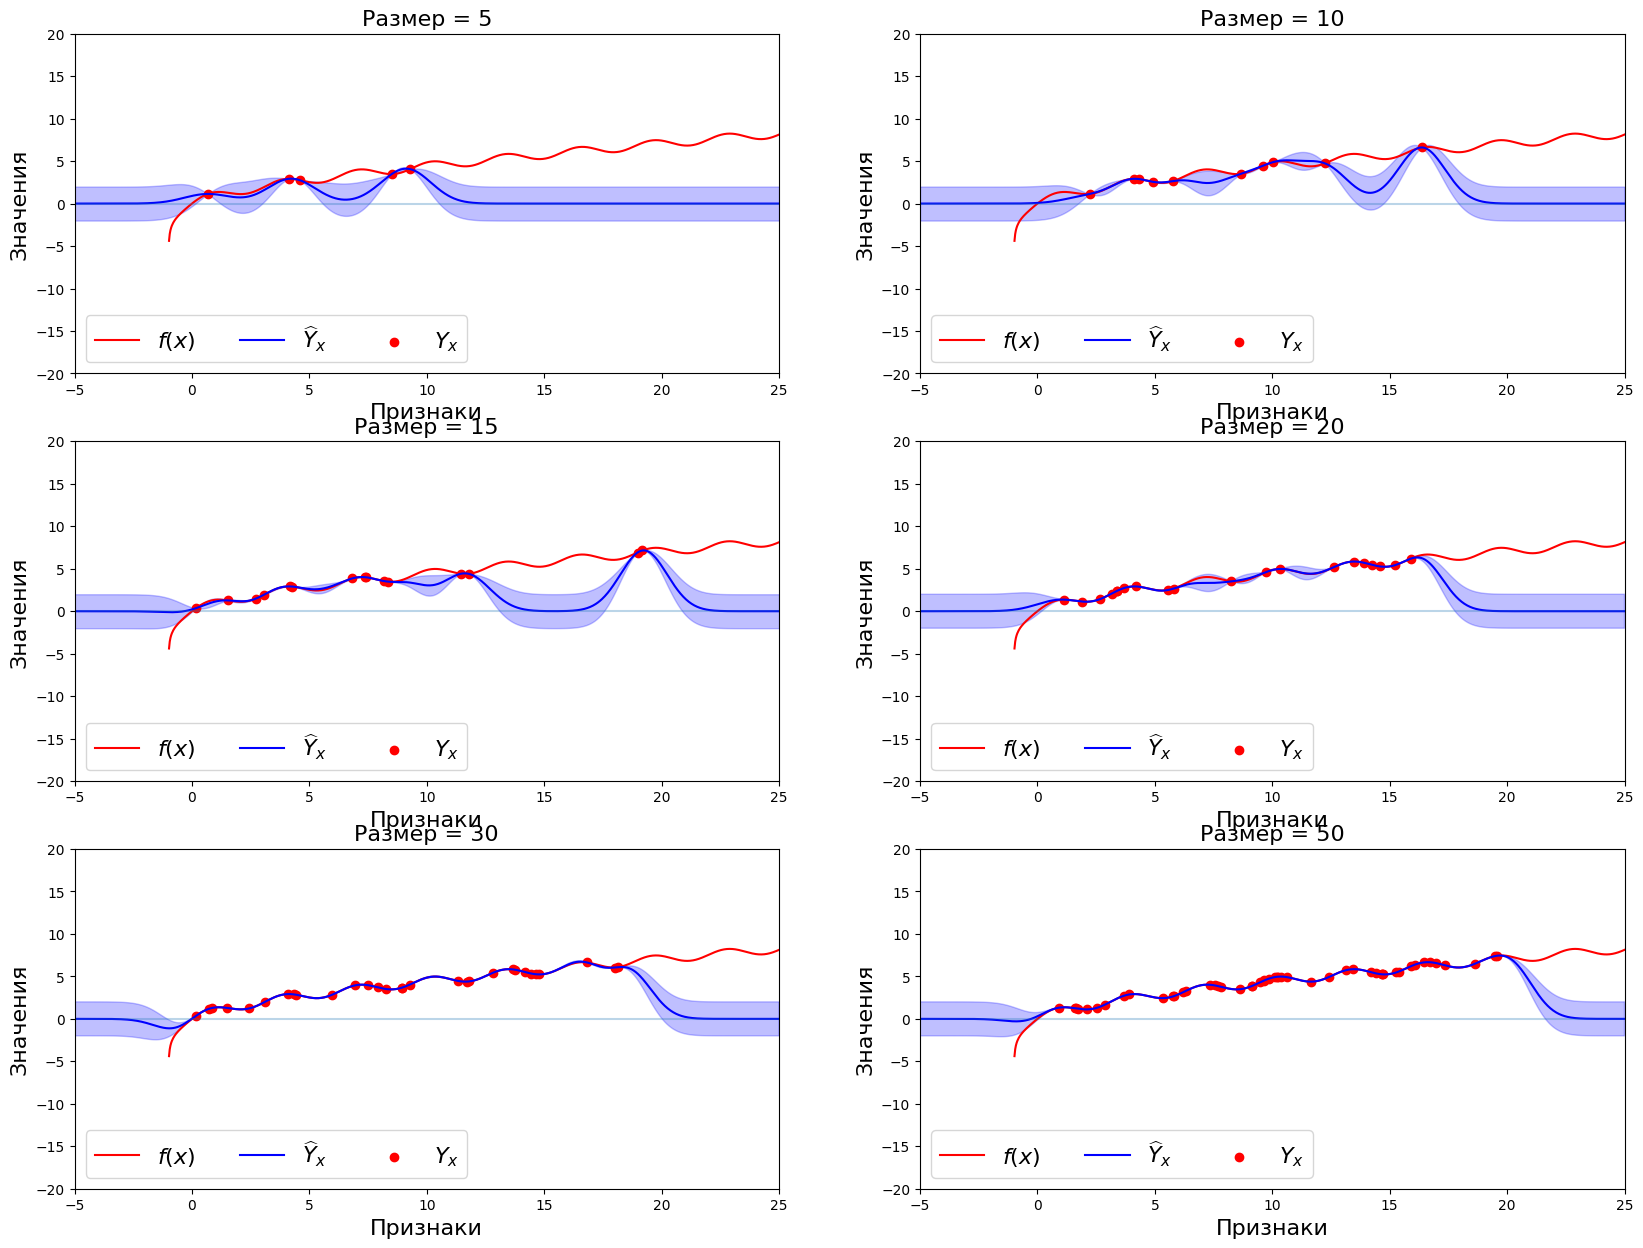

In [18]:
plt.figure(figsize=(20, 15))
for i, size in tqdm(enumerate([5, 10, 15, 20, 30, 50])):  # size --- количество наблюдаемых данных
    X = sps.uniform(loc=0, scale=20).rvs(size=size)  # Генерация данных
    Y = calc_f(X)

    # Y += sps.norm(loc=0, scale=0.3).rvs(size=Y.shape)

    gpr = GaussianProcessRegression(exp_cov).fit(X.reshape((-1, 1)), Y)  # Применение регрессии
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict, sigma

    plt.subplot(3, 2, i+1)  # Построение графиков
    plt.plot(grid, calc_f(grid), color='red', label='$f(x)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{Y}_x$')
    plt.fill_between(grid, predict + 2*sigma, predict - 2*sigma, color='blue', alpha=0.25)
    plt.scatter(X, Y, color='red', label='$Y_x$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5,25))
    plt.ylim((-20,20))
    plt.title('Размер = {}'.format(size), fontsize=16)
    plt.xlabel('Признаки', fontsize=16)
    plt.ylabel('Значения', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

Теперь предположим, что измерения проводятся с погрешностью, то есть $\sigma > 0$. Скопируйте код выше в новую ячейку, раскомментируйте строчку кода и запустите.

4it [00:00, 37.52it/s]/tmp/ipykernel_31/2119596884.py:22: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt((self.C[0,0] - (K[:,None,:] @ self.C_inv @ K[...,None])).squeeze())
6it [00:00, 35.21it/s]


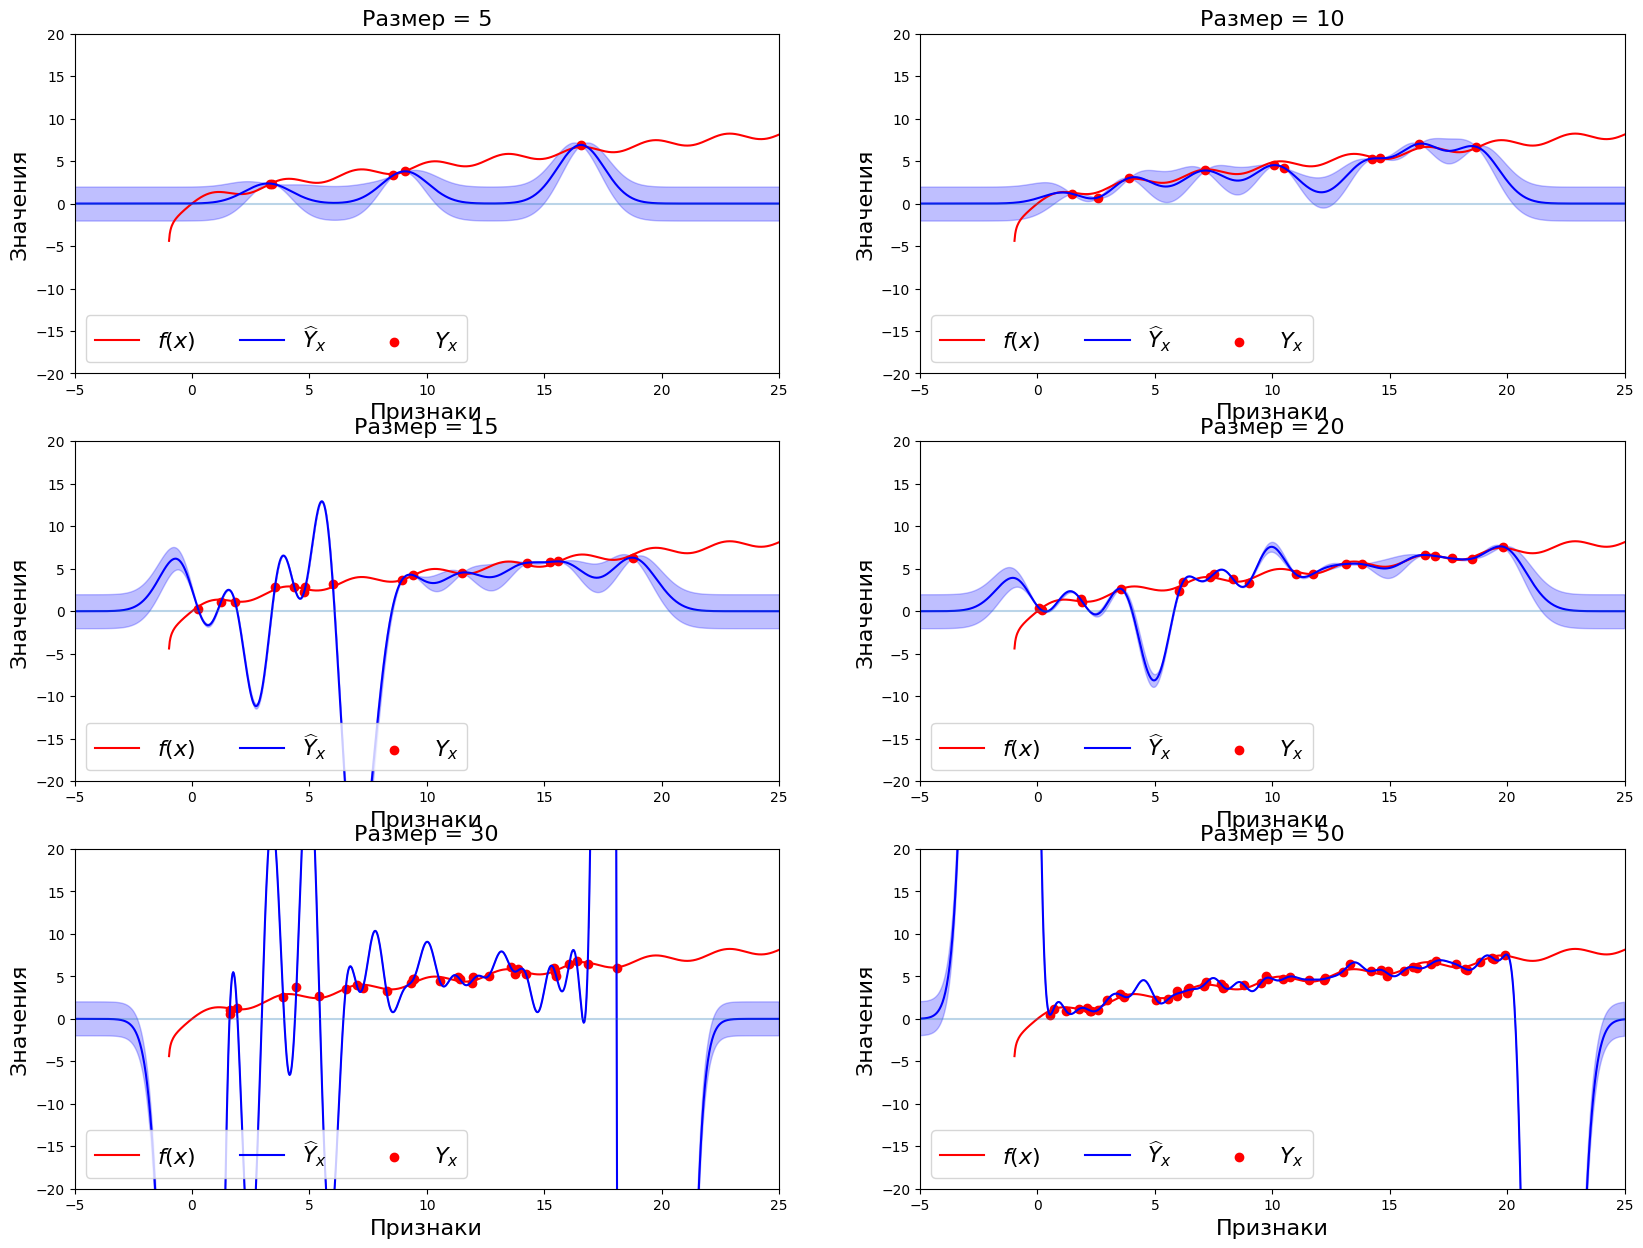

In [19]:
plt.figure(figsize=(20, 15))
for i, size in tqdm(enumerate([5, 10, 15, 20, 30, 50])):  # size --- количество наблюдаемых данных
    X = sps.uniform(loc=0, scale=20).rvs(size=size)  # Генерация данных
    Y = calc_f(X)

    Y += sps.norm(loc=0, scale=0.3).rvs(size=Y.shape)

    gpr = GaussianProcessRegression(exp_cov).fit(X.reshape((-1, 1)), Y)  # Применение регрессии
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict, sigma

    plt.subplot(3, 2, i+1)  # Построение графиков
    plt.plot(grid, calc_f(grid), color='red', label='$f(x)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{Y}_x$')
    plt.fill_between(grid, predict + 2*sigma, predict - 2*sigma, color='blue', alpha=0.25)
    plt.scatter(X, Y, color='red', label='$Y_x$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5,25))
    plt.ylim((-20,20))
    plt.title('Размер = {}'.format(size), fontsize=16)
    plt.xlabel('Признаки', fontsize=16)
    plt.ylabel('Значения', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

Почему получается так плохо? Что нужно сделать, чтобы это исправить?

*Не хватает регуляризации (картина "скачков" напоминает фит полинома высокой степени на маленькой выборке по мнк)*

Исправьте это.

6it [00:00, 14.22it/s]


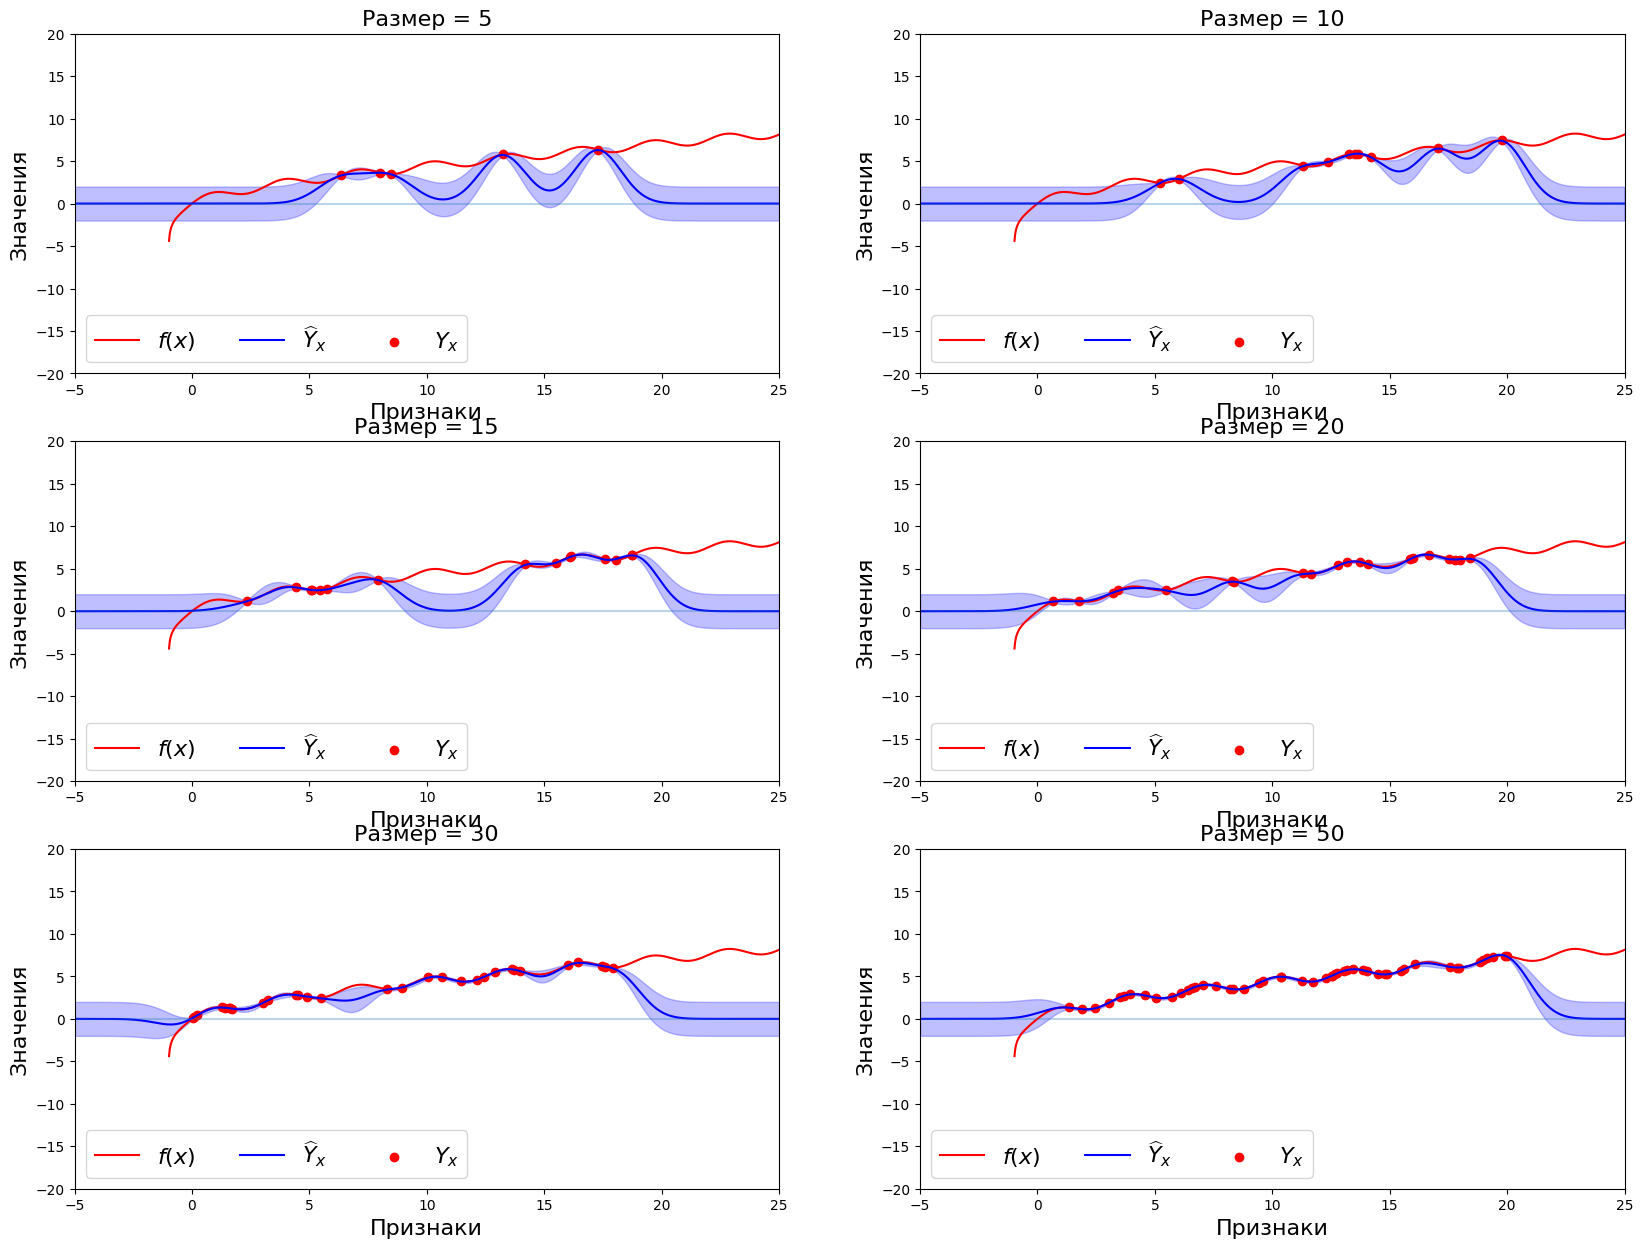

In [20]:
plt.figure(figsize=(20, 15))
for i, size in tqdm(enumerate([5, 10, 15, 20, 30, 50])):  # size --- количество наблюдаемых данных
    X = sps.uniform(loc=0, scale=20).rvs(size=size)  # Генерация данных
    Y = calc_f(X)

    # Y += sps.norm(loc=0, scale=0.3).rvs(size=Y.shape)

    gpr = GaussianProcessRegression(exp_cov).fit(X.reshape((-1, 1)), Y, regularize=1e-2)  # Применение регрессии
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict, sigma

    plt.subplot(3, 2, i+1)  # Построение графиков
    plt.plot(grid, calc_f(grid), color='red', label='$f(x)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{Y}_x$')
    plt.fill_between(grid, predict + 2*sigma, predict - 2*sigma, color='blue', alpha=0.25)
    plt.scatter(X, Y, color='red', label='$Y_x$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5,25))
    plt.ylim((-20,20))
    plt.title('Размер = {}'.format(size), fontsize=16)
    plt.xlabel('Признаки', fontsize=16)
    plt.ylabel('Значения', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

6it [00:00, 38.21it/s]


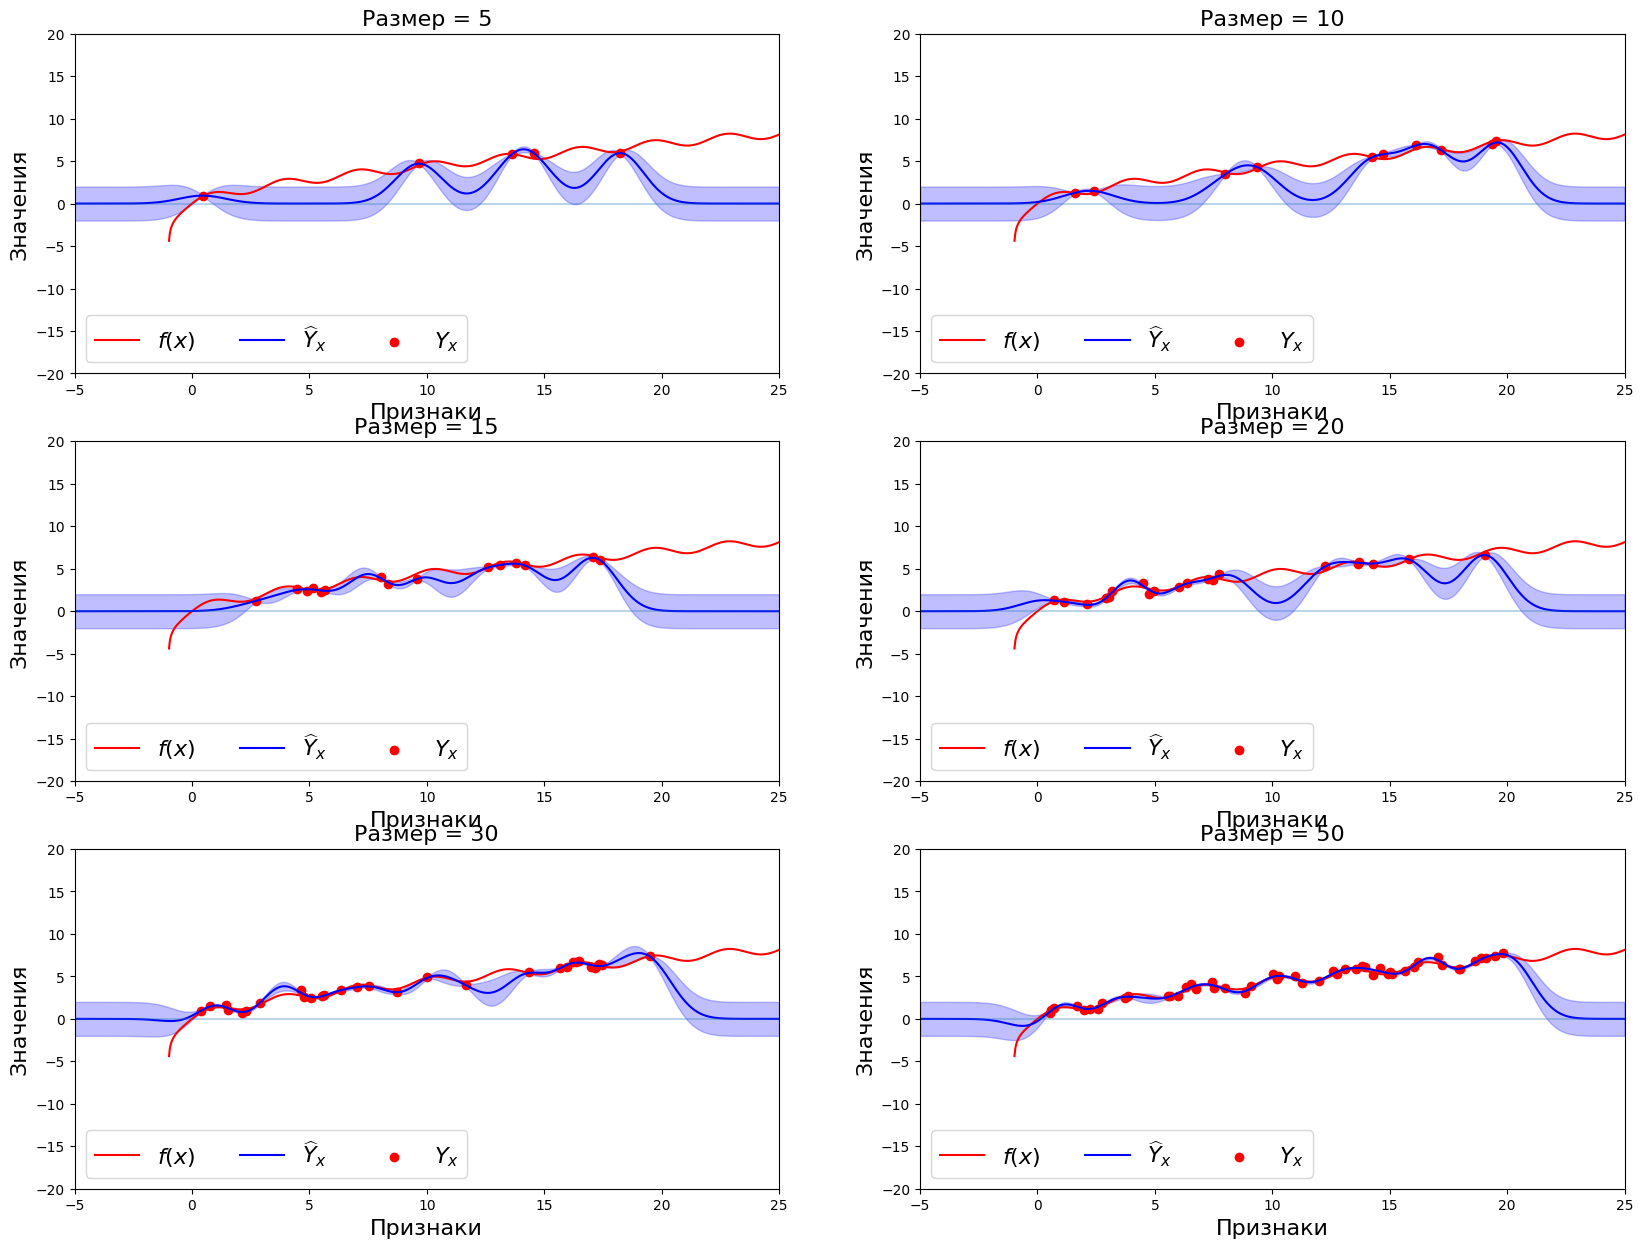

In [21]:
plt.figure(figsize=(20, 15))
for i, size in tqdm(enumerate([5, 10, 15, 20, 30, 50])):  # size --- количество наблюдаемых данных
    X = sps.uniform(loc=0, scale=20).rvs(size=size)  # Генерация данных
    Y = calc_f(X)

    Y += sps.norm(loc=0, scale=0.3).rvs(size=Y.shape)

    gpr = GaussianProcessRegression(exp_cov).fit(X.reshape((-1, 1)), Y, regularize=1e-2)  # Применение регрессии
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict, sigma

    plt.subplot(3, 2, i+1)  # Построение графиков
    plt.plot(grid, calc_f(grid), color='red', label='$f(x)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{Y}_x$')
    plt.fill_between(grid, predict + 2*sigma, predict - 2*sigma, color='blue', alpha=0.25)
    plt.scatter(X, Y, color='red', label='$Y_x$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5,25))
    plt.ylim((-20,20))
    plt.title('Размер = {}'.format(size), fontsize=16)
    plt.xlabel('Признаки', fontsize=16)
    plt.ylabel('Значения', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

Почему стало лучше?

*С регуляриизацией матрица лучше обусловлена, т.е. "дальше" от вырожденной. При обращении теперь не делиим на близкий к нулю детерминант и не улетаем в бесконечность*  

Однако, это все равно не поясняет, почему в самом первом случае (при $\sigma=0$) мог наблюдаться похожий эффект. В чем его причина?

*Может страдать точность самих вычислений*

Вспомним наше предположение о том, что математическое ожидание равно нулю, хотя на самом деле это не так.
Давайте это исправим.
В примере выше перед применением регрессии вычтете среднее значение, а после &mdash; добавьте обратно.

6it [00:00, 34.51it/s]


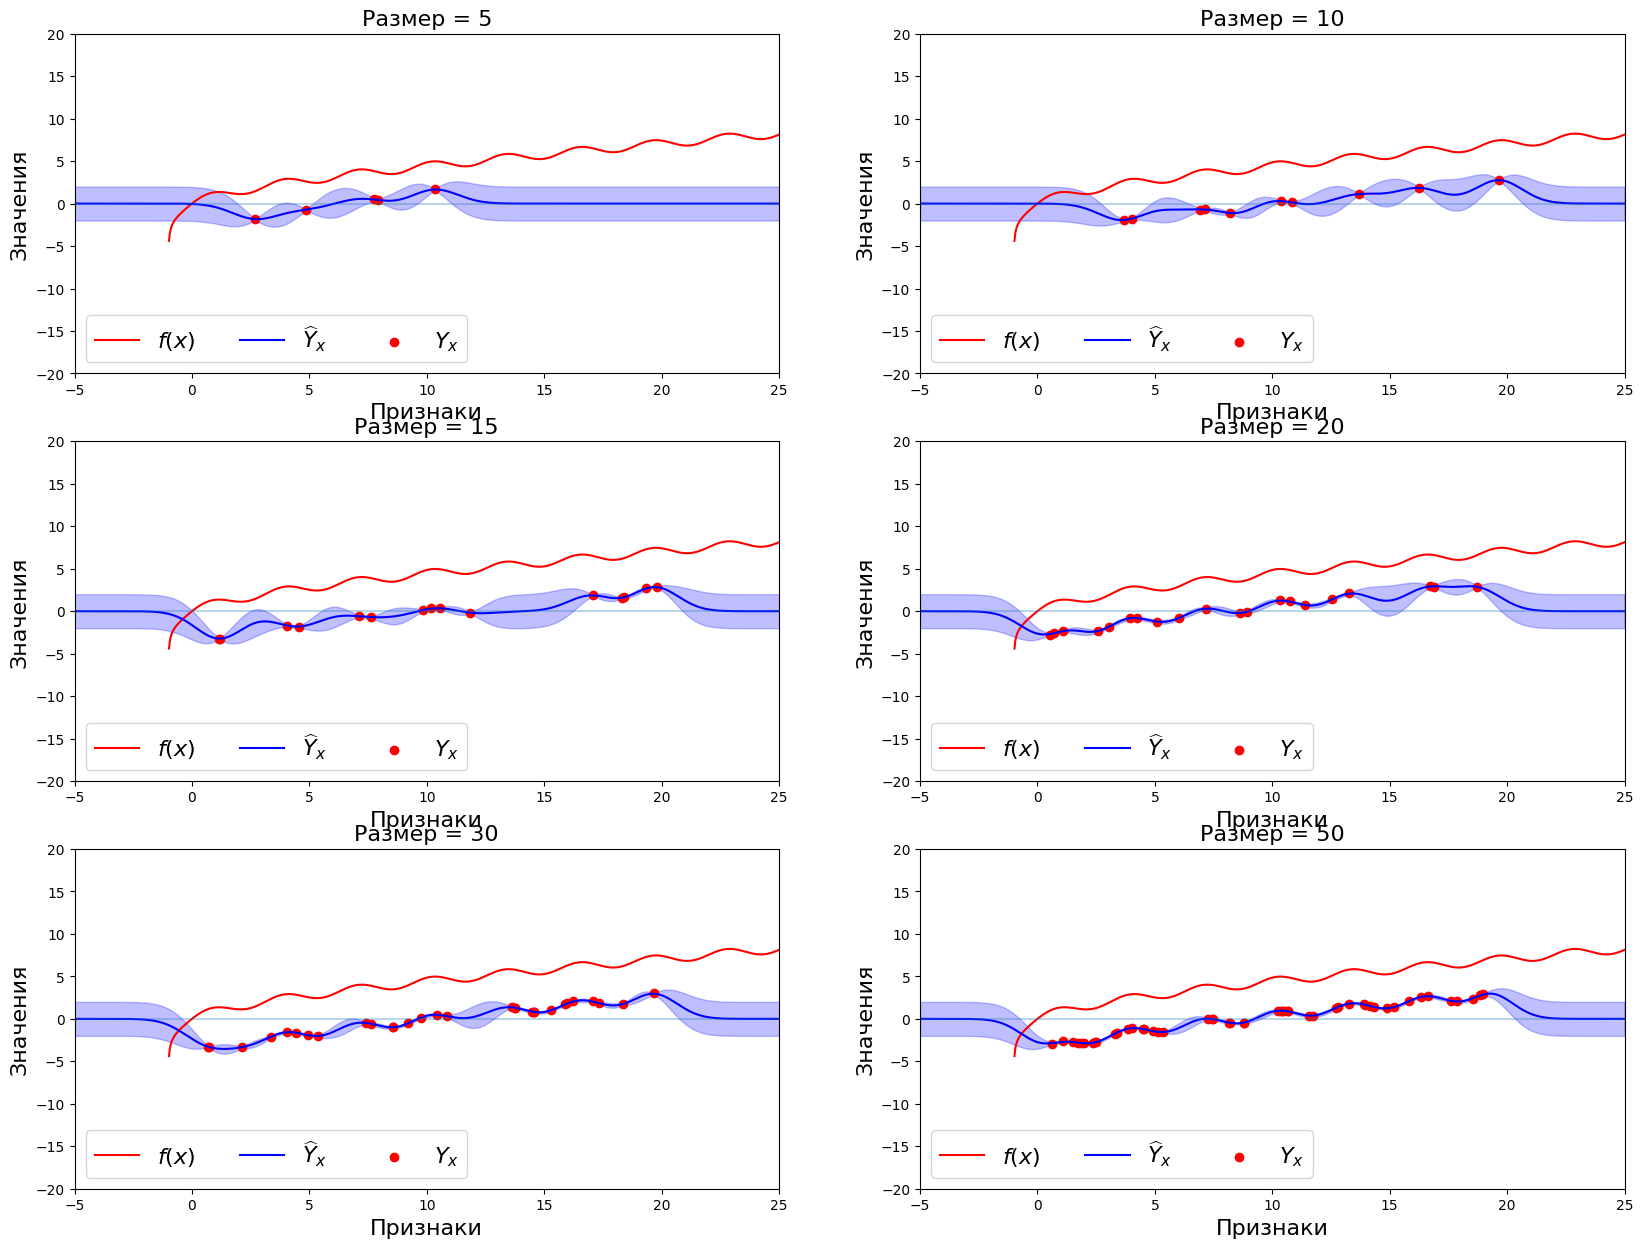

In [22]:
plt.figure(figsize=(20, 15))
for i, size in tqdm(enumerate([5, 10, 15, 20, 30, 50])):  # size --- количество наблюдаемых данных
    X = sps.uniform(loc=0, scale=20).rvs(size=size)  # Генерация данных
    Y = calc_f(X)

    # Y += sps.norm(loc=0, scale=0.3).rvs(size=Y.shape)
    Y -= Y.mean()

    gpr = GaussianProcessRegression(exp_cov).fit(X.reshape((-1, 1)), Y, regularize=1e-2)  # Применение регрессии
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict, sigma

    plt.subplot(3, 2, i+1)  # Построение графиков
    plt.plot(grid, calc_f(grid), color='red', label='$f(x)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{Y}_x$')
    plt.fill_between(grid, predict + 2*sigma, predict - 2*sigma, color='blue', alpha=0.25)
    plt.scatter(X, Y, color='red', label='$Y_x$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5,25))
    plt.ylim((-20,20))
    plt.title('Размер = {}'.format(size), fontsize=16)
    plt.xlabel('Признаки', fontsize=16)
    plt.ylabel('Значения', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

6it [00:00, 17.51it/s]


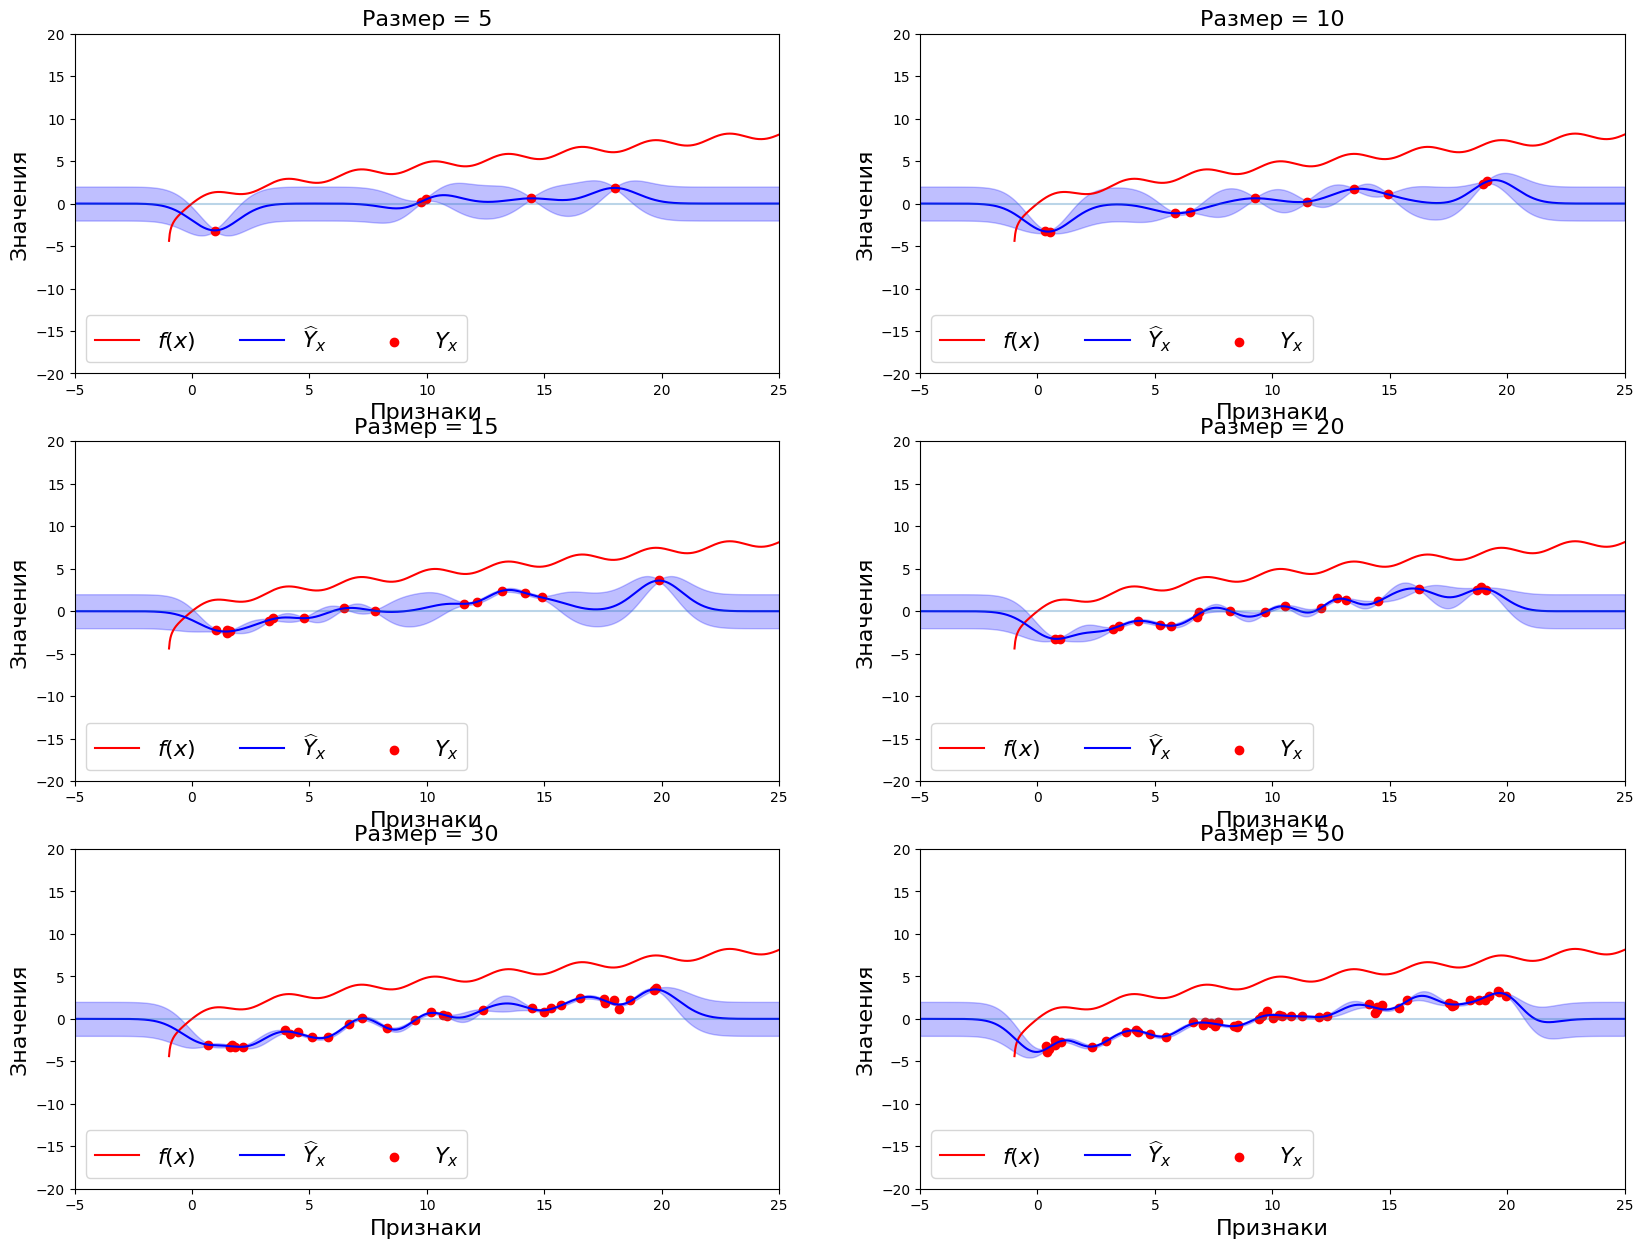

In [23]:
plt.figure(figsize=(20, 15))
for i, size in tqdm(enumerate([5, 10, 15, 20, 30, 50])):  # size --- количество наблюдаемых данных
    X = sps.uniform(loc=0, scale=20).rvs(size=size)  # Генерация данных
    Y = calc_f(X)

    Y += sps.norm(loc=0, scale=0.3).rvs(size=Y.shape)
    Y -= Y.mean()

    gpr = GaussianProcessRegression(exp_cov).fit(X.reshape((-1, 1)), Y, regularize=1e-2)  # Применение регрессии
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict, sigma

    plt.subplot(3, 2, i+1)  # Построение графиков
    plt.plot(grid, calc_f(grid), color='red', label='$f(x)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{Y}_x$')
    plt.fill_between(grid, predict + 2*sigma, predict - 2*sigma, color='blue', alpha=0.25)
    plt.scatter(X, Y, color='red', label='$Y_x$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5,25))
    plt.ylim((-20,20))
    plt.title('Размер = {}'.format(size), fontsize=16)
    plt.xlabel('Признаки', fontsize=16)
    plt.ylabel('Значения', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

*почти ничего не поменялось, просто предикт сместился вниз (до нуля)*

__________________
### Задача 2.

Оптимизируйте следующую функцию при помощи байесовской оптимизации.

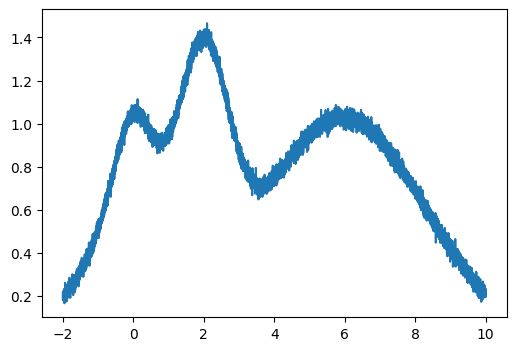

In [24]:
def target(x):
    return np.exp(-(x-2)**2) + np.exp(-(x-6)**2/10) + 1/ (x**2 + 1)+ sps.norm(scale=0.02).rvs(size=x.shape)

plot(np.linspace(-2, 10, 10000), target)

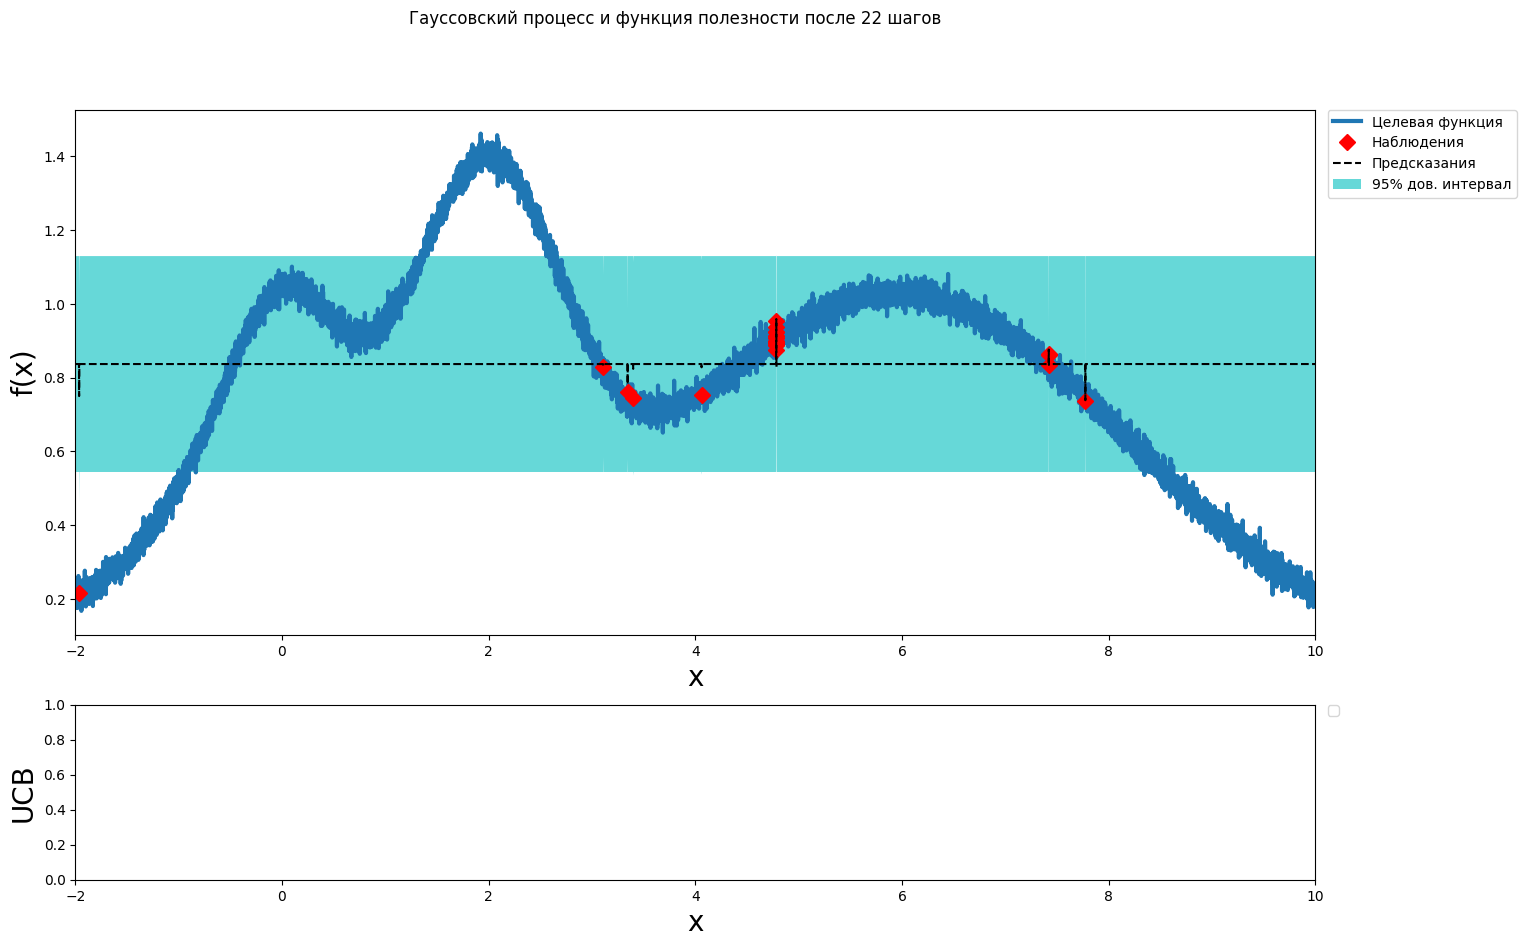

In [25]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state=27)
optimizer.maximize(init_points=2, n_iter=0)  #, kappa=5) BayesianOptimization.maximize() got an unexpected keyword argument 'kappa' !!!
x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)
    return optimizer._gp.predict(grid, return_std=True)  # mu, sigma

for i in range(20):
    sleep(1)
    optimizer.maximize(init_points=0, n_iter=1)  #, kappa=5) BayesianOptimization.maximize() got an unexpected keyword argument 'kappa' !!!
    x_obs, y_obs = np.array([[res["params"]["x"]] for res in optimizer.res]), np.array([res["target"] for res in optimizer.res])
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    steps = len(optimizer.space)
    clear_output(wait=True)
    plt.figure(figsize=(16, 10))
    plt.suptitle('Гауссовский процесс и функция полезности после {} шагов'.format(steps), fontdict={'size':20})
    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    axis, acq = plt.subplot(gs[0]), plt.subplot(gs[1])
    axis.plot(x, y, linewidth=3, label='Целевая функция')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Наблюдения', color='r')
    axis.plot(x, mu, '--', color='k', label='Предсказания')
    axis.fill(np.concatenate([x, x[::-1]]), np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]), alpha=.6, fc='c', ec='None', label='95% дов. интервал')
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    # utility = UtilityFunction(kind="ucb", kappa=5, xi=0).utility(x, optimizer._gp, 0)
    # acq.plot(x, utility, label='UCB', color='purple')
    # acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, label=u'Следующая точка', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    # acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('UCB', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    plt.show()

__________________
### Задача 3.


Рассмотрите датасет `houses_train.csv` из задания 3.8 по машинному обучению с прошлого семестра. С помощью байесовской оптимизации подберите оптимальные гиперпараметров по метрике MAPE для модели `CatBoost`.

Рассмотрите следующие гиперпараметры:
* количество деревьев;
* максимальная глубина дерева;
* шаг обучения;
* параметры регуляризации.

Сколько итераций и времени занял процесс оптимизации?

<b><font color="#00b565" size="5">Исправил код и ответ</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>  
▫️ Не обработаны фичи. Комм. Странно иметь в сыром виде фичи id, date, zipcode в датасете. Инд. комм. zipcode (-7.0)  
▫️ Нет ответа на вопрос "Сколько итераций и времени занял процесс оптимизации". (-5.0)  
</i>  

In [26]:
df, cat = pd.read_csv('/kaggle/input/houses-train/houses_train.csv').drop(columns=['id','date','zipcode']), ['waterfront','view','condition','grade']
display(df.head(3))
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df.price, test_size=0.2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000


In [27]:
print(f'{MAPE(CatBoostRegressor(cat_features=cat, silent=True).fit(X_train,y_train).predict(X_test), y_test):.4f}')

0.1177


In [29]:
start = time()
BayesianOptimization(
    f=lambda n,d,l,r: -MAPE(CatBoostRegressor(cat_features=cat, silent=True, n_estimators=int(n), max_depth=int(d), learning_rate=l, l2_leaf_reg=r).fit(X_train,y_train).predict(X_test), y_test), 
    pbounds={'n':(10,999), 'd':(1,10), 'l':(1e-3,1e-1), 'r': (0,1)}, verbose=2, random_state=42
).maximize()
print(f'{time() - start:.2f} секунд')

|   iter    |  target   |     d     |     l     |     n     |     r     |
-------------------------------------------------------------------------
| 1         | -0.1224   | 4.371     | 0.09512   | 733.9     | 0.5987    |
| 2         | -0.2821   | 2.404     | 0.01644   | 67.44     | 0.8662    |
| 3         | -0.1807   | 6.41      | 0.0711    | 30.36     | 0.9699    |
| 4         | -0.1421   | 8.492     | 0.02202   | 189.8     | 0.1834    |
| 5         | -0.1375   | 3.738     | 0.05295   | 437.2     | 0.2912    |
| 6         | -0.1296   | 3.097     | 0.08199   | 710.4     | 0.00557   |
| 7         | -0.1779   | 2.23      | 0.007772  | 782.6     | 0.4013    |
| 8         | -0.1205   | 5.697     | 0.07482   | 733.7     | 0.5957    |
| 9         | -0.121    | 6.024     | 0.09063   | 378.3     | 0.7258    |
| 10        | -0.1801   | 2.136     | 0.01784   | 326.3     | 0.8191    |
| 11        | -0.119    | 7.757     | 0.0997    | 498.5     | 0.3915    |
| 12        | -0.131    | 3.292     | 

*чуть улучшиились отн бейзлайна*  
*Процесс потребовал 30 итераций (занял 234 сек)*

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>